In [1]:
import pandas as pd # standard
import numpy as np # standard

import matplotlib.pyplot as plt
import seaborn as sns

import thermogram_utilities

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")
df['CancerType'] = np.where(df['CancerType'].isna(), 'Control', df['CancerType'])

# get location of cut off values
lower_column_index = df.columns.get_loc("T51")
upper_column_index = df.columns.get_loc("T83.1")
label_column_index = df.columns.get_loc("CancerType")

column_indices = np.arange(lower_column_index, upper_column_index)
column_indices = np.append(column_indices, 0)
column_indices = np.append(column_indices, 1)



column_indices = np.append(column_indices, label_column_index)

df = df.iloc[:, column_indices]

# keep only Control and Adenocarcinoma for analysis
#df_tree = df[(df['CancerType'] == 'SCLC') | (df['CancerType'] == 'Squamous')]


In [3]:
df_long = pd.melt(df, id_vars=['sample_id', 'pub_id', 'CancerType'], var_name='temp', value_name='dsp' )

median_df = thermogram_utilities.median_curve(df_long, 'CancerType', 'temp', 'dsp')

median_df['temperature'] = median_df['temperature'].str.replace('T', '').astype(float)

<Axes: xlabel='temperature', ylabel='median'>

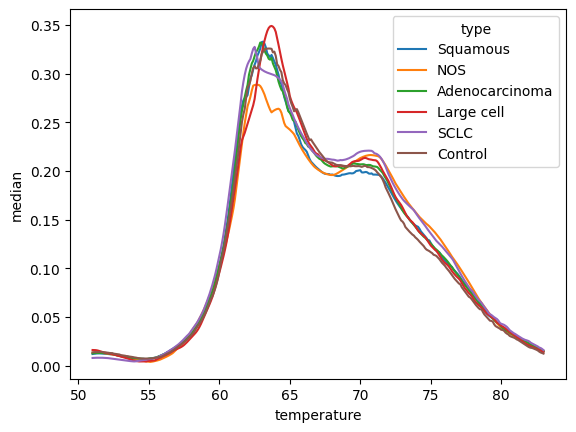

In [4]:
sns.lineplot(median_df, x = "temperature", y = "median", hue = "type")

Text(0, 0.5, 'Meadian Specific Excess Heat Capacity')

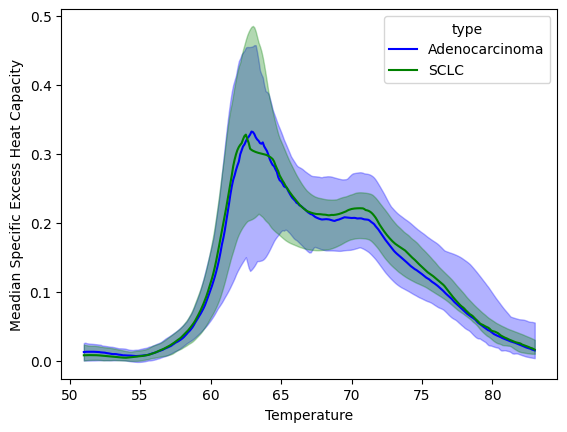

In [5]:
# adeno, sclc

graph_df = median_df[(median_df["type"] == "Adenocarcinoma") | (median_df["type"] == "SCLC")]
colors = {'Adenocarcinoma': 'blue', 'SCLC': 'green'}  # Specify colors for each type

# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type', palette=colors)

# Create separate ribbons for each "type" with matching colors
for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], color=colors[type_name], alpha=0.3, label=type_name)

plt.xlabel("Temperature")
plt.ylabel("Meadian Specific Excess Heat Capacity")



Text(0, 0.5, 'Meadian Specific Excess Heat Capacity')

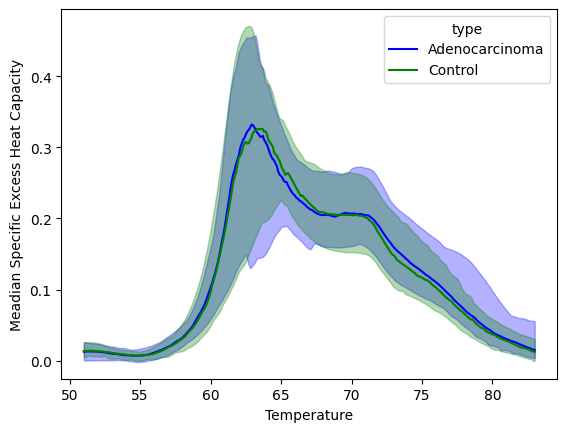

In [6]:
# adeno, control

graph_df = median_df[(median_df["type"] == "Adenocarcinoma") | (median_df["type"] == "Control")]
colors = {'Adenocarcinoma': 'blue', 'Control': 'green'}  # Specify colors for each type

# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type', palette=colors)

# Create separate ribbons for each "type" with matching colors
for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], color=colors[type_name], alpha=0.3, label=type_name)

plt.xlabel("Temperature")
plt.ylabel("Meadian Specific Excess Heat Capacity")

Text(0, 0.5, 'Meadian Specific Excess Heat Capacity')

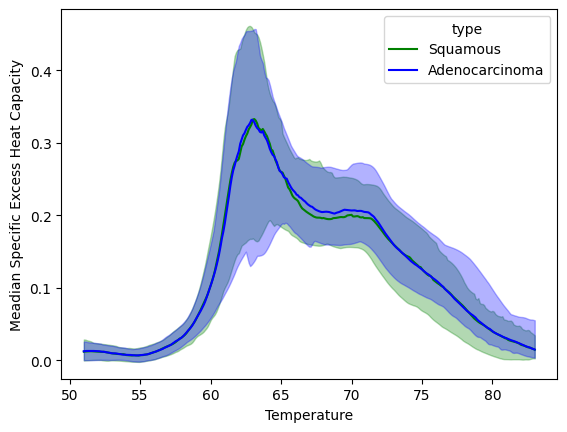

In [7]:
# adeno, squamous

graph_df = median_df[(median_df["type"] == "Adenocarcinoma") | (median_df["type"] == "Squamous")]
colors = {'Adenocarcinoma': 'blue', 'Squamous': 'green'}  # Specify colors for each type

# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type', palette=colors)

# Create separate ribbons for each "type" with matching colors
for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], color=colors[type_name], alpha=0.3, label=type_name)
plt.xlabel("Temperature")
plt.ylabel("Meadian Specific Excess Heat Capacity")

Text(0, 0.5, 'Meadian Specific Excess Heat Capacity')

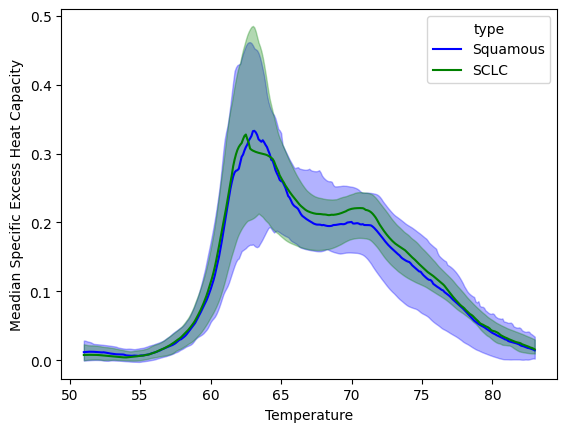

In [8]:
# sclc, squamous

graph_df = median_df[(median_df["type"] == "Squamous") | (median_df["type"] == "SCLC")]
colors = {'Squamous': 'blue', 'SCLC': 'green'}  # Specify colors for each type

# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type', palette=colors)

# Create separate ribbons for each "type" with matching colors
for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], color=colors[type_name], alpha=0.3, label=type_name)
plt.xlabel("Temperature")
plt.ylabel("Meadian Specific Excess Heat Capacity")

Text(0, 0.5, 'Meadian Specific Excess Heat Capacity')

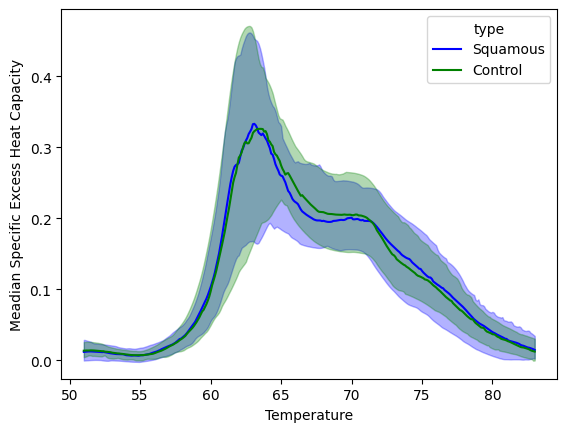

In [9]:
# squamous, control

graph_df = median_df[(median_df["type"] == "Squamous") | (median_df["type"] == "Control")]
colors = {'Squamous': 'blue', 'Control': 'green'}  # Specify colors for each type

# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type', palette=colors)

# Create separate ribbons for each "type" with matching colors
for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], color=colors[type_name], alpha=0.3, label=type_name)

plt.xlabel("Temperature")
plt.ylabel("Meadian Specific Excess Heat Capacity")

Text(0, 0.5, 'Meadian Specific Excess Heat Capacity')

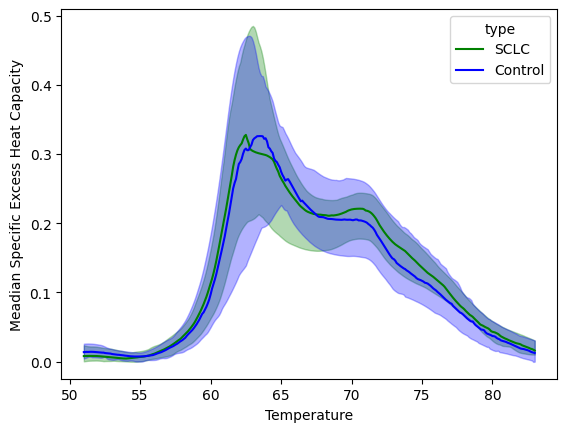

In [10]:
# control, sclc

graph_df = median_df[(median_df["type"] == "Control") | (median_df["type"] == "SCLC")]
colors = {'Control': 'blue', 'SCLC': 'green'}  # Specify colors for each type

# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type', palette=colors)

# Create separate ribbons for each "type" with matching colors
for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], color=colors[type_name], alpha=0.3, label=type_name)

plt.xlabel("Temperature")
plt.ylabel("Meadian Specific Excess Heat Capacity")